In [53]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#import model packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, roc_auc_score, f1_score, roc_curve, r2_score


In [54]:
# import pickle
df_baseline = pd.read_pickle('data_strube/pickles/baseline_model_openweather.pkl')

In [55]:
df_baseline.head()

,betaine_nir,cry_nir,csy_nir,dm_nir,fieldid,region,invert_nir,mark_nir,ms_comp,obj,...,temp_min_6,temp_min_7,temp_min_8,temp_min_9,temp_max_4,temp_max_5,temp_max_6,temp_max_7,temp_max_8,temp_max_9
0,0.1551,54.60,8.838976,21.5439,Emmeloord,Niederlande,0.1769,5.3553,2.0,23.0,...,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
1,0.1502,51.07,8.493911,21.8552,Emmeloord,Niederlande,0.1539,5.2233,6.0,3.0,...,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
2,0.1370,52.73,8.356650,21.1878,Emmeloord,Niederlande,0.1643,5.3398,2.0,28.0,...,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
3,0.1391,44.33,6.957815,21.1140,Emmeloord,Niederlande,0.1647,5.4185,1.0,33.0,...,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
4,0.1286,50.00,7.835800,20.8531,Emmeloord,Niederlande,0.1615,5.1815,2.0,7.0,...,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431


In [56]:
df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14427 entries, 0 to 16476
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   betaine_nir       14427 non-null  float64
 1   cry_nir           14427 non-null  float64
 2   csy_nir           14427 non-null  float64
 3   dm_nir            14427 non-null  float64
 4   fieldid           14427 non-null  object 
 5   region            14427 non-null  object 
 6   invert_nir        14427 non-null  float64
 7   mark_nir          14427 non-null  float64
 8   ms_comp           14427 non-null  float64
 9   obj               14427 non-null  float64
 10  otype_comp        14427 non-null  float64
 11  pollinator_comp   14427 non-null  float64
 12  sc_nir            14427 non-null  float64
 13  seednames_coded   14427 non-null  float64
 14  seriesid          14427 non-null  float64
 15  totaln_nir        14427 non-null  float64
 16  x                 14427 non-null  float6

In [57]:
# categorize region and station_location
df_baseline[['region', 'station_location']] = df_baseline[['region', 'station_location']].astype('category')

In [58]:
df_baseline.station_location.unique()

['Emmeloord', 'Lelystad', 'Herchsheim', 'Lamotte', 'Mattenkofen', ..., 'Bautzen', 'Stadthagen', 'Goderville', 'Soest', 'Anklam']
Length: 12
Categories (12, object): ['Anklam', 'Bautzen', 'Emmeloord', 'Goderville', ..., 'Pithiviers', 'Soest', 'Stadthagen', 'Vierhoefen']

In [59]:
df_baseline['region_cat'] = df_baseline['region'].cat.codes
df_baseline['statloc_cat'] = df_baseline['station_location'].cat.codes

In [60]:
# drop highly correlated features, unnecessary columns and categorical columns
df_baseline.drop(['betaine_nir', 'cry_nir', 'dm_nir', 'invert_nir', 'mark_nir', 'sc_nir', 'fieldid', 'region', 'station_location','ms_comp', 'obj', 'otype_comp', 'pollinator_comp','seriesid', 'totaln_nir', 'x', 'y','region_cat',
       'statloc_cat'], axis=1, inplace=True)

In [61]:
df_baseline.columns

Index(['csy_nir', 'seednames_coded', 'temp_4', 'temp_5', 'temp_6', 'temp_7',
       'temp_8', 'temp_9', 'temp_min_4', 'temp_min_5', 'temp_min_6',
       'temp_min_7', 'temp_min_8', 'temp_min_9', 'temp_max_4', 'temp_max_5',
       'temp_max_6', 'temp_max_7', 'temp_max_8', 'temp_max_9'],
      dtype='object')

In [62]:
df_baseline.head()

,csy_nir,seednames_coded,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,temp_min_4,temp_min_5,temp_min_6,temp_min_7,temp_min_8,temp_min_9,temp_max_4,temp_max_5,temp_max_6,temp_max_7,temp_max_8,temp_max_9
0,8.838976,85.0,6.757444,11.166156,18.049931,18.425712,17.290726,16.362861,5.291972,9.750255,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
1,8.493911,1204.0,6.757444,11.166156,18.049931,18.425712,17.290726,16.362861,5.291972,9.750255,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
2,8.356650,90.0,6.757444,11.166156,18.049931,18.425712,17.290726,16.362861,5.291972,9.750255,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
3,6.957815,1142.0,6.757444,11.166156,18.049931,18.425712,17.290726,16.362861,5.291972,9.750255,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431
4,7.835800,95.0,6.757444,11.166156,18.049931,18.425712,17.290726,16.362861,5.291972,9.750255,16.552139,17.191142,16.049395,15.022736,8.23275,12.522003,19.447611,19.62461,18.49914,17.533431


<AxesSubplot:>

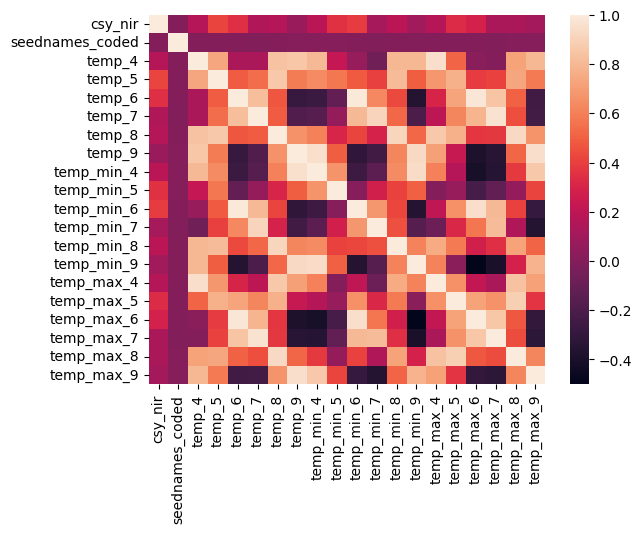

In [63]:
sns.heatmap(df_baseline.corr())

In [64]:
# define X and y
X = df_baseline.drop('csy_nir', axis=1)
y = df_baseline['csy_nir']
print(f"We have {X.shape[0]} observations in our dataset and {X.shape[1]} features")
print(f"Our target vector has also {y.shape[0]} values")

We have 14427 observations in our dataset and 19 features
Our target vector has also 14427 values


In [65]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# instantiate model
baseline_linreg = LinearRegression()

# fit model
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [67]:
# predict sugarcontent of trian and test-set
y_train_pred = baseline_linreg.predict(X_train)
baseline_pred = baseline_linreg.predict(X_test)


In [68]:
# Mean Squared Error
print('MSE Lin Reg Train:\n', mean_squared_error(y_train, y_train_pred))
print('MSE Lin Reg Test:\n', mean_squared_error(y_test, baseline_pred))

# Root Mean Squared Error
print('RMSE Lin Reg Train:\n', mean_squared_error(y_train, y_train_pred, squared = False))
print('RMSE Lin Reg Test:\n', mean_squared_error(y_test, baseline_pred, squared = False))

# R^2 Score
print('R^2 Lin Reg Train:\n', r2_score(y_train, y_train_pred))
print('R^2 Lin Reg Test:\n', r2_score(y_test, baseline_pred))

MSE Lin Reg Train:
 0.9135898240580822
MSE Lin Reg Test:
 0.9054590310204671
RMSE Lin Reg Train:
 0.9558189284891162
RMSE Lin Reg Test:
 0.9515561102848676
R^2 Lin Reg Train:
 0.7103438768946773
R^2 Lin Reg Test:
 0.7094971111298436


In [69]:
def error_analysis(y_test, y_pred):
    """Generated true vs. predicted values and residual scatter plot for models
    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """
    # Calculate residuals
    residuals = y_test - y_pred
    # Plot real vs. predicted values
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    ax[0].scatter(y_pred, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred.min()-2.5), (y_pred.max()+2.5))
    ax[0].set_ylim((residuals.min()-1), (residuals.max()+20))
    ax[1].scatter(y_pred, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred.min()-2.5), (y_pred.max()+2.5))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

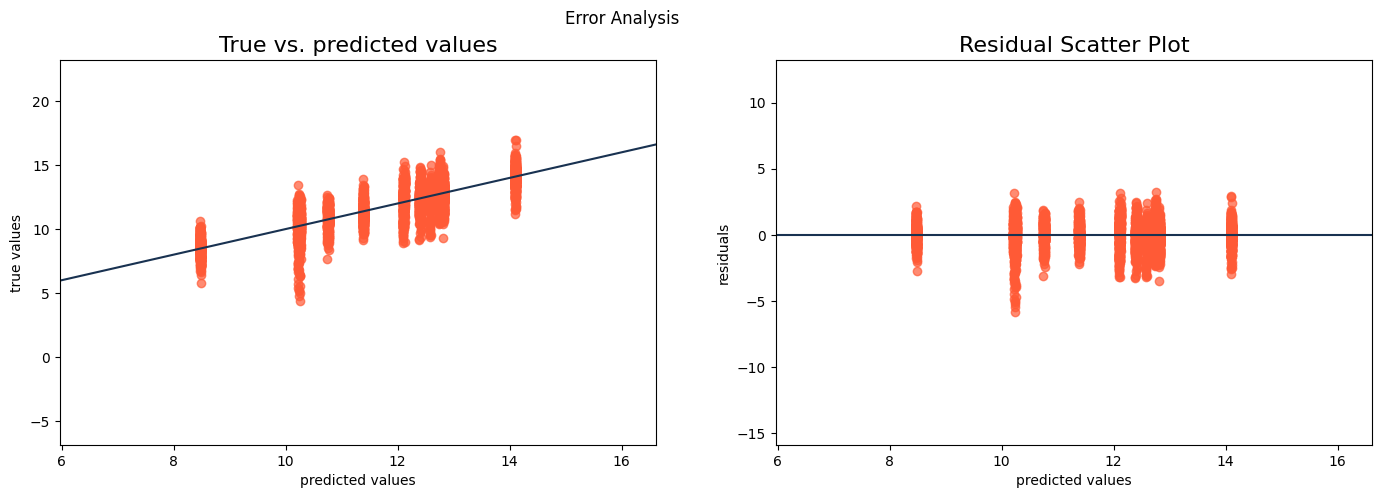

In [70]:
error_analysis(y_test,baseline_pred)